<a href="https://colab.research.google.com/github/Rmianm/Regresion_Logistica/blob/master/Regresi%C3%B3n_log%C3%ADstica_Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns 
#%matplotlib inline Nos permite insertar gráficos en el notebook, hay versiones que no es necesario.

In [2]:
diabetes = pd.read_csv('/content/drive/MyDrive/Machine L./Datasets/diabetes.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
diabetes.shape

(768, 9)

In [3]:
feature_cols = ['Pregnancies','Insulin','BMI','Age','Glucose','BloodPressure','DiabetesPedigreeFunction']
x = diabetes[feature_cols]
y = diabetes.Outcome

In [ ]:
print(y)

In [ ]:
#También puedes hacerlo así
x = diabetes.drop(['Outcome'],axis=1)
y = diabetes['Outcome']

In [6]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size =0.20, random_state = 0)

In [17]:
#logreg = LogisticRegression()
#Si tenemos un warning por iteraciones ejecutamos la línea de abajo
logreg = LogisticRegression(max_iter=10000)

In [ ]:
logreg.fit(x_train,y_train)

In [20]:
y_pred = logreg.predict(x_test)

In [21]:
#Matriz de confusión para validar modelo
matrix = metrics.confusion_matrix(y_test,y_pred)

[Text(0, 0.5, '1'), Text(0, 1.5, '0')]

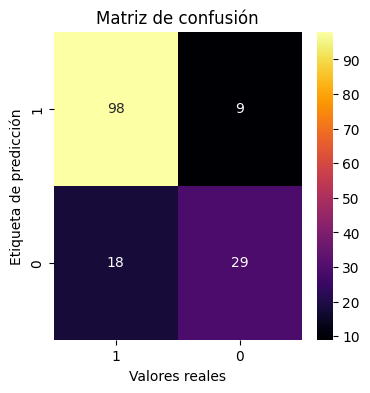

In [27]:
fig, ax = plt.subplots(figsize=(4,4))
sns.heatmap((matrix),annot = True, cmap='inferno',fmt='g')
plt.title('Matriz de confusión')
plt.ylabel('Etiqueta de predicción') 
plt.xlabel('Valores reales')
tick_labels = [1,0]
ax.set_xticklabels(tick_labels)
ax.set_yticklabels(tick_labels)

In [31]:
print('Exactitud', round(metrics.accuracy_score(y_test,y_pred),2))

Exactitud 0.82
